# Model 3: Gradient Boosted Regression

In [51]:
X = final_cleaned1.drop(columns=["Streams"])
y = pd.DataFrame(final_cleaned1["Streams"])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
X_train.shape

(1212, 25)

In [53]:
#Function to evaluate accuracy of model based on MAPE
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100-mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [54]:
#Initial fitting of the base model with basic hyperparameters, and acquiring its accuracy and average error.

gbrt=GradientBoostingRegressor(learning_rate=0.01)  
gbrt.fit(X_train, np.ravel(y_train)) 

base_accuracy = evaluate(gbrt, X_test, np.ravel(y_test))

y_train_pred = gbrt.predict(X_train)
y_test_pred = gbrt.predict(X_test)

Model Performance
Average Error: 1153862.9820
Accuracy = 82.71%.


In [59]:
# Fit the grid search to the data and attain the best hyperparameters for the tuning, and also indicating improvement

gbr=GradientBoostingRegressor()
grid = {
    
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'n_estimators' : np.arange(100,1200,100),
    'max_depth' : [3,4,5,6,7],}
    
gb_cv = GridSearchCV(gbr,grid,n_jobs = -1,scoring = 'neg_mean_absolute_percentage_error')
gb_cv.fit(X_train,np.ravel(y_train))

best_grid1 = gb_cv.best_estimator_
grid_accuracy = evaluate(best_grid1, X_test, np.ravel(y_test))
print("Best Parameters:",gb_cv.best_params_)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 600607.6316
Accuracy = 91.42%.
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Improvement of 10.54%.


In [60]:
y_train_pred2 = best_grid1.predict(X_train)
y_test_pred2=best_grid1.predict(X_test)

In [61]:
# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Base Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbrt.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred)*100))
print()

#Prediction Accuracy of Base Model
MSE_predicted = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Base Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbrt.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred)*100))
print()


# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred2)
print("Goodness of Fit of Tuned Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", best_grid1.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred2)*100))
print()

#Prediction Accuracy of Model
MSE_predicted = mean_squared_error(y_test, y_test_pred2)
print("Goodness of Fit of Tuned Model \tTest Dataset")
print("Explained Variance (R^2) \t:", best_grid1.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred2)*100))
print()

Goodness of Fit of Base Model 	Train Dataset
Explained Variance (R^2) 	: 0.6629861969177899
Mean Squared Error (MSE) 	: 4075149759983.0405
Root Mean Squared Error (RMSE) 	: 2018700.01733369
Mean Absolute Percentage error (MAPE) 	: 18.06%

Goodness of Fit of Base Model 	Test Dataset
Explained Variance (R^2) 	: 0.4977933249617831
Mean Squared Error (MSE) 	: 3859182951235.222
Root Mean Squared Error (RMSE) 	: 1964480.3259985126
Mean Absolute Percentage error (MAPE) 	: 17.29%

Goodness of Fit of Tuned Model 	Train Dataset
Explained Variance (R^2) 	: 0.9771295088264584
Mean Squared Error (MSE) 	: 276548544196.6217
Root Mean Squared Error (RMSE) 	: 525878.83033701
Mean Absolute Percentage error (MAPE) 	: 6.07%

Goodness of Fit of Tuned Model 	Test Dataset
Explained Variance (R^2) 	: 0.7951809013919175
Mean Squared Error (MSE) 	: 1573922475991.637
Root Mean Squared Error (RMSE) 	: 1254560.6705104527
Mean Absolute Percentage error (MAPE) 	: 8.58%



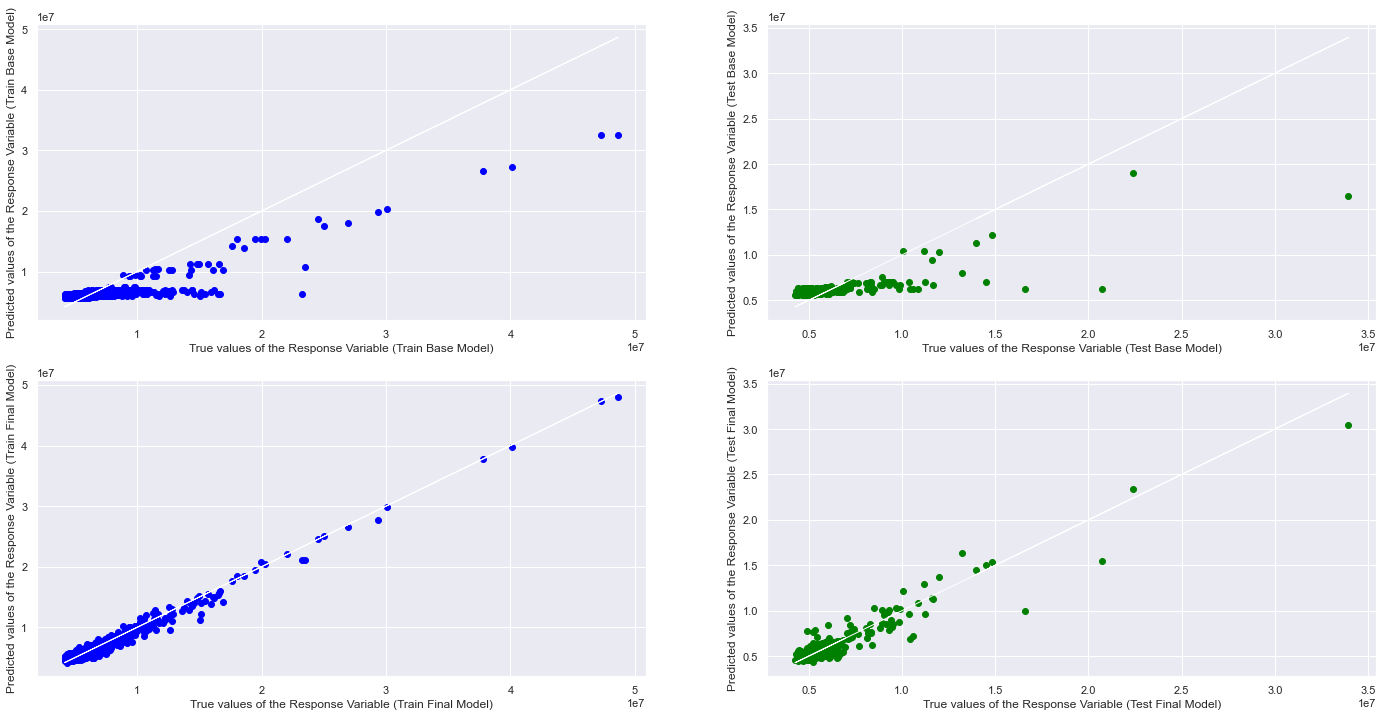

In [50]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0,0].scatter(y_train, y_train_pred, color = "blue")
axes[0,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0,0].set_xlabel("True values of the Response Variable (Train Base Model)")
axes[0,0].set_ylabel("Predicted values of the Response Variable (Train Base Model)")
axes[0,1].scatter(y_test, y_test_pred, color = "green")
axes[0,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[0,1].set_xlabel("True values of the Response Variable (Test Base Model)")
axes[0,1].set_ylabel("Predicted values of the Response Variable (Test Base Model)")
axes[1,0].scatter(y_train, y_train_pred2, color = "blue")
axes[1,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[1,0].set_xlabel("True values of the Response Variable (Train Final Model)")
axes[1,0].set_ylabel("Predicted values of the Response Variable (Train Final Model)")
axes[1,1].scatter(y_test, y_test_pred2, color = "green")
axes[1,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1,1].set_xlabel("True values of the Response Variable (Test Final Model)")
axes[1,1].set_ylabel("Predicted values of the Response Variable (Test Final Model)")
plt.show()

Also, by looking at the true vs predicted graph, there is clear improvement in the predictions of the actual y values after tuning the hyperparameters. As compared to the linear model, the data points using GBR are much better fitted.